In [71]:
import torch
from PIL import Image
import numpy as np
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import PIL
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.transforms import ToPILImage, ToTensor
from torchvision.utils import make_grid

from natsort import natsorted

from util import visualization

to_pil = ToPILImage()

In [72]:
og_dataroot = '/home/giancarlo/data/innosuisse/fs_lost_and_found'
back_dataroot = '/home/giancarlo/data/innosuisse/fs_lost_and_found_back'
how_many = 5

original_paths = [os.path.join(og_dataroot, 'original', image) 
                  for image in os.listdir(os.path.join(og_dataroot, 'original'))]
labels_paths = [os.path.join(og_dataroot, 'labels', image) 
                  for image in os.listdir(os.path.join(og_dataroot, 'labels'))]

semantic_paths = [os.path.join(og_dataroot, 'semantic', image) 
                  for image in os.listdir(os.path.join(og_dataroot, 'semantic'))]
back_semantic_paths = [os.path.join(back_dataroot, 'semantic', image) 
                  for image in os.listdir(os.path.join(back_dataroot, 'semantic'))]

synthesis_paths = [os.path.join(og_dataroot, 'synthesis', image) 
                  for image in os.listdir(os.path.join(og_dataroot, 'synthesis'))]
back_synthesis_paths = [os.path.join(back_dataroot, 'synthesis', image) 
                  for image in os.listdir(os.path.join(back_dataroot, 'synthesis'))]

# We need to sort the images to ensure all the pairs match with each other
original_paths = natsorted(original_paths)
labels_paths = natsorted(labels_paths)
semantic_paths = natsorted(semantic_paths)
back_semantic_paths = natsorted(back_semantic_paths)
synthesis_paths = natsorted(synthesis_paths)
back_synthesis_paths = natsorted(back_synthesis_paths)

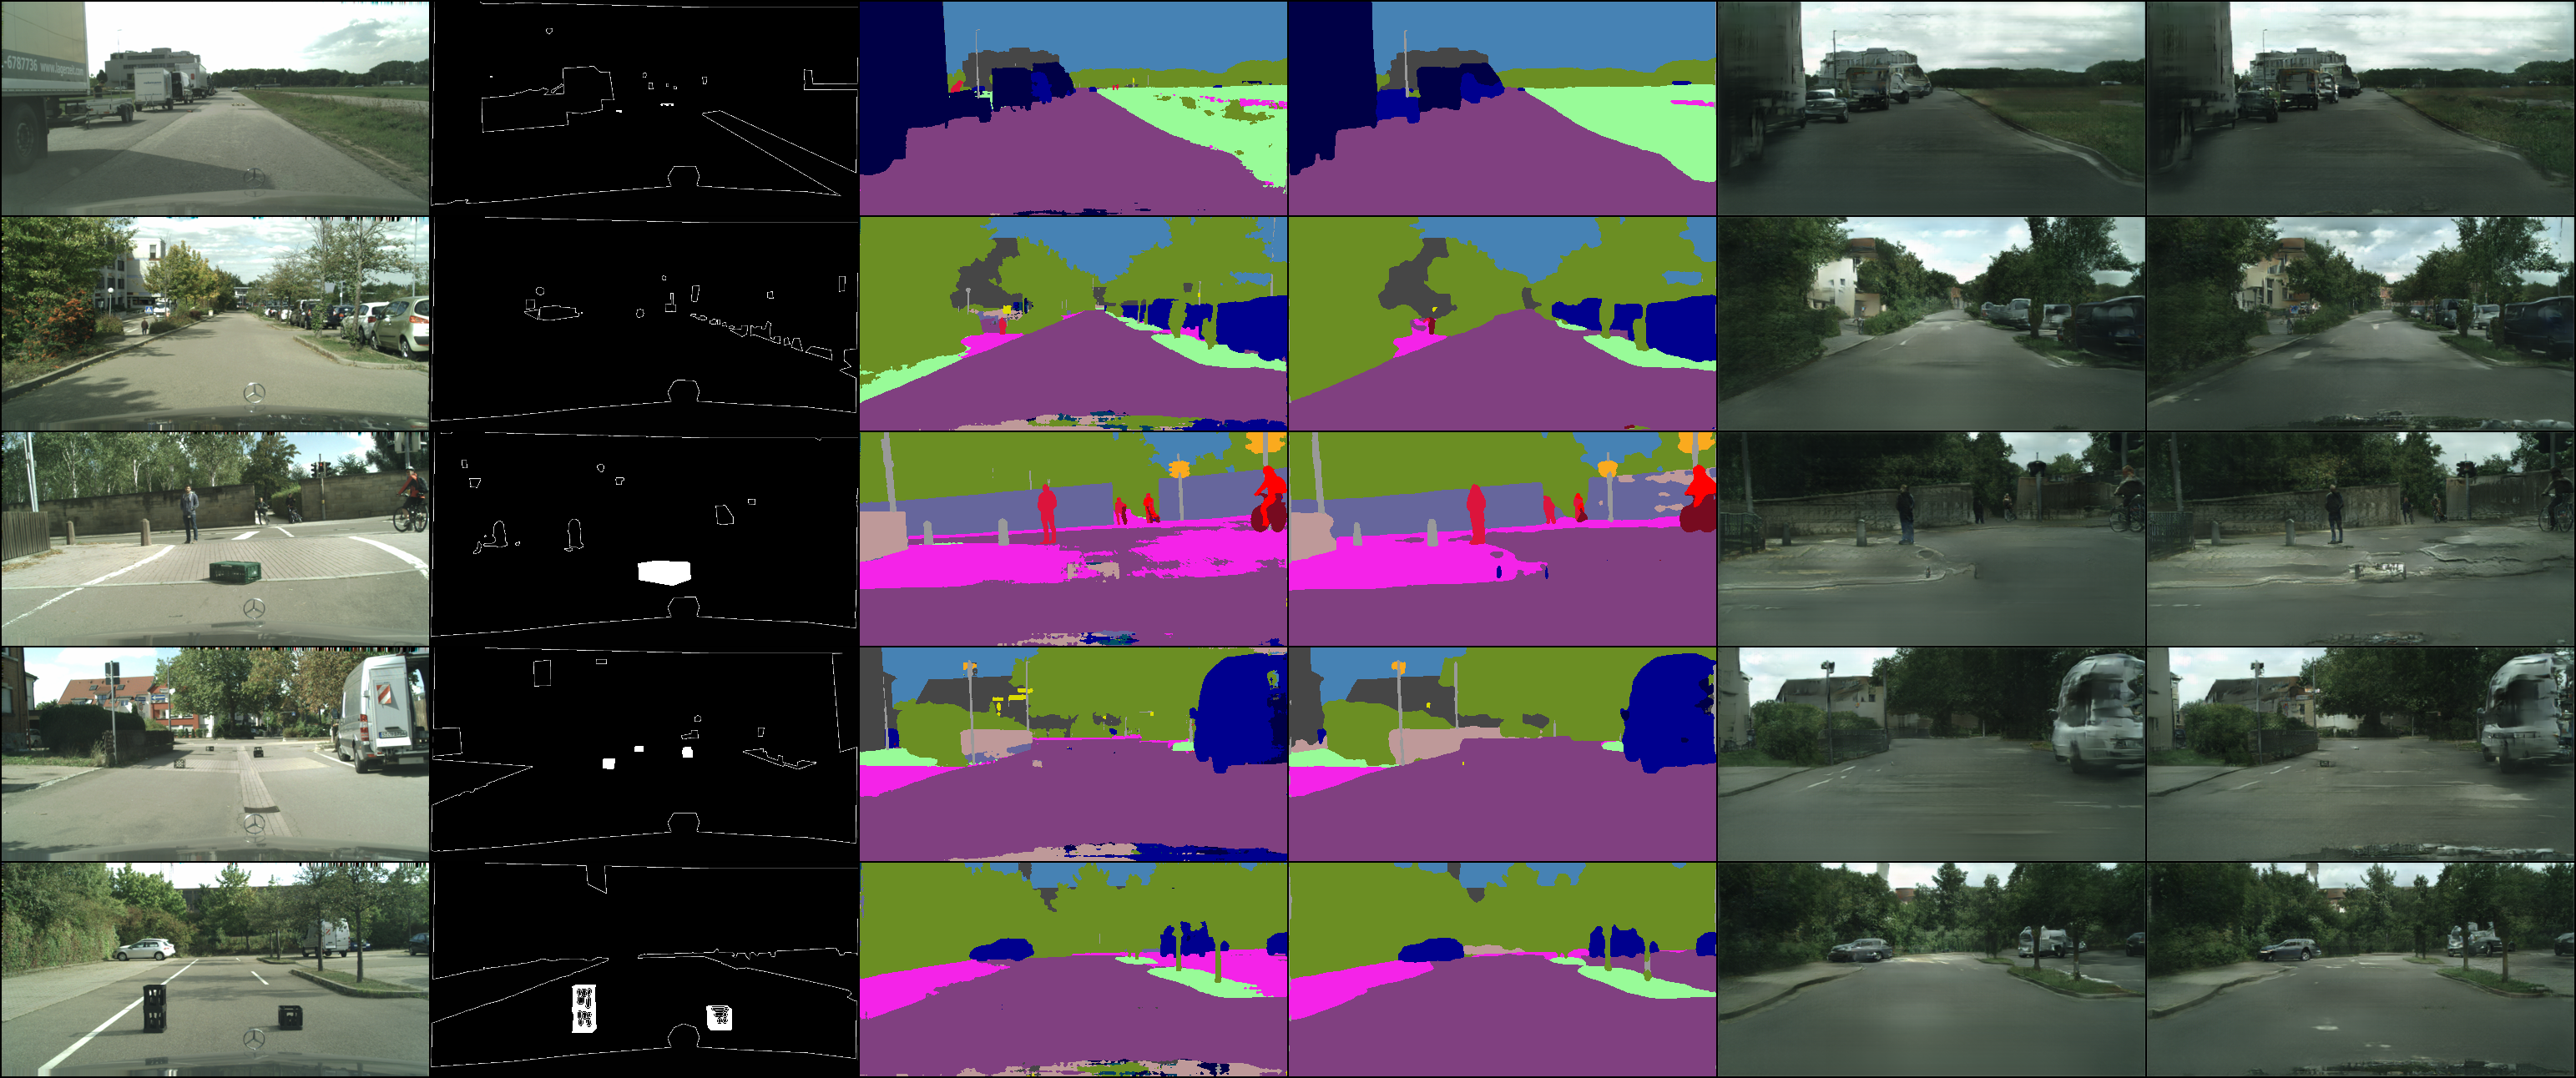

In [73]:
all_images = torch.zeros([how_many*6, 3, 256, 512])
for idx, (original, label, semantic, semantic_b, synthesis_b, synthesis) in enumerate(zip(original_paths, labels_paths, semantic_paths, back_semantic_paths, synthesis_paths, back_synthesis_paths)):
    if idx == how_many:
        break
    semantic_img = np.array(Image.open(semantic))
    semantic_b_img = np.array(Image.open(semantic_b))
    semantic_img = visualization.colorize_mask(semantic_img).resize((512, 256))
    semantic_b_img = visualization.colorize_mask(semantic_b_img).resize((semantic_img.size))
    
    synthesis_img = Image.open(synthesis)
    synthesis_b_img = Image.open(synthesis_b)
    
    original_img = Image.open(original).resize((512, 256))
    label_img = Image.fromarray(np.asarray(Image.open(label).resize((512, 256)))*255)
    
    all_images[idx*6, :, :, :] = ToTensor()(original_img.convert('RGB'))
    all_images[idx*6+1, :, :, :] = ToTensor()(label_img.convert('RGB'))

    all_images[idx*6+2, :, :, :] = ToTensor()(semantic_img.convert('RGB'))
    all_images[idx*6+3, :, :, :] = ToTensor()(semantic_b_img.convert('RGB'))
    all_images[idx*6+4, :, :, :] = ToTensor()(synthesis_img.convert('RGB'))
    all_images[idx*6+5, :, :, :] = ToTensor()(synthesis_b_img.convert('RGB'))
    
grid = make_grid(all_images, 6)
grid = to_pil(grid)
display(grid)
    
    